datasets Kaggle:
https://www.kaggle.com/datasets?sizeStart=5%2CMB&sizeEnd=10%2CMB

# Ema Ilic

https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics

In [ ]:
import re, sklearn, warnings, math, pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt, matplotlib
import plotly.graph_objs as go, plotly.offline as py, plotly.tools as tls
from matplotlib_venn import venn2
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# import settings
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,...,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,pop_density,age_median
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,tract,99685,907,53.621091,-166.770979,2823180154,3101986247,4619,2725,1894,1366.24657,1405.0,650.16380,131.50967,372.0,0.85676,0.65676,0.47838,0.35405,0.28108,0.21081,0.15135,0.12432,661,370,107394.63092,92807.0,70691.05352,329.85389,874.0,114330.20465,...,63955.77136,161.15239,519.0,2266.22562,2283.0,768.53497,41.65644,155.0,840.67205,776.0,341.85580,58.0,29.74375,0.00469,0.01408,0.02817,0.72770,0.50216,0.77143,0.30304,0.82841,0.82784,0.82940,38.45838,39.25000,17.65453,709.06255,2725.0,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802,0.000002,36.243001
220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,tract,99577,907,61.174250,-149.284329,509234898,1859309,3727,1780,1947,2347.69441,2351.0,382.73576,4.32064,44.0,0.79545,0.56818,0.56818,0.45455,0.20455,0.20455,0.20455,0.00000,50,44,136547.39117,119141.0,84268.79529,288.40934,1103.0,148641.70829,...,69628.72286,159.20875,836.0,2485.10777,2306.0,919.76234,180.92883,797.0,712.33066,742.0,336.98847,256.0,159.32270,0.03609,0.06078,0.07407,0.75689,0.15520,0.56228,0.23925,0.94090,0.97253,0.91503,37.26216,39.33333,19.66765,503.83410,1780.0,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575,0.000007,39.507468
220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,tract,99505,907,61.284745,-149.653973,270593047,66534601,8736,5166,3570,2071.30766,2089.0,442.89099,195.07816,1749.0,0.99469,0.97403,0.92680,0.89020,0.73022,0.62574,0.54368,0.32999,1933,1694,69361.23167,57976.0,45054.38537,1104.22753,1955.0,67678.50158,...,38155.76319,1023.98149,1858.0,NaN,NaN,NaN,NaN,NaN,525.89101,810.0,392.27170,22.0,10.83444,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.99097,0.99661,0.98408,21.96291,22.25000,11.09657,1734.05720,5166.0,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838,0.000032,22.624601
220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,tract,99501,907,61.229560,-149.893037,2371512,9966854,1941,892,1049,943.79086,914.0,308.34101,396.51652,720.0,0.97046,0.81435,0.67651,0.58509,0.39381,0.32208,0.27286,0.20253,723,711,66790.89936,48230.0,59069.63484,562.35527,902.0,78660.39446,...,61242.79596,227.29223,390.0,2289.79186,2359.0,697.02686,34.96584,140.0,491.86501,558.0,187.02879,39.0,24.35354,0.00000,0.00000,0.04469,0.78212,1.00000,0.69931,0.18899,0.89274,0.94301,0.84871,35.81912,34.00000,22.03023,213.71499,892.0,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563,0.000818,34.000000
220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,tract,99504,907,61.217082,-149.767214,1979230,0,5981,3076,2905,1372.84472,1222.0,541.82102,251.53249,878.0,0.97836,0.90319,0.80068,0.66856,0.45900,0.34738,0.24829,0.11276,914,878,76752.81635,66459.0,53486.53205,1015.66547,2065.0,80981.17730,...,53414.82667,623.26325,1290.0,1904.16410,1678.0,773.

In [ ]:
#missing values
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)
#ID is always missing so we're gonna have to fill in for it. UID is a location ID and this should
#be modified because python by default takes it as an id of the table.

BLOCKID , 39030
SUMLEVEL , 0
COUNTYID , 0
STATEID , 0
state , 0
state_ab , 0
city , 0
place , 0
type , 0
primary , 0
zip_code , 0
area_code , 0
lat , 0
lng , 0
ALand , 0
AWater , 0
pop , 0
male_pop , 0
female_pop , 0
rent_mean , 462
rent_median , 462
rent_stdev , 462
rent_sample_weight , 462
rent_samples , 462
rent_gt_10 , 463
rent_gt_15 , 463
rent_gt_20 , 463
rent_gt_25 , 463
rent_gt_30 , 463
rent_gt_35 , 463
rent_gt_40 , 463
rent_gt_50 , 463
universe_samples , 0
used_samples , 0
hi_mean , 390
hi_median , 390
hi_stdev , 390
hi_sample_weight , 390
hi_samples , 390
family_mean , 434
family_median , 434
family_stdev , 434
family_sample_weight , 434
family_samples , 434
hc_mortgage_mean , 841
hc_mortgage_median , 841
hc_mortgage_stdev , 841
hc_mortgage_sample_weight , 841
hc_mortgage_samples , 841
hc_mean , 890
hc_median , 890
hc_stdev , 890
hc_samples , 890
hc_sample_weight , 890
home_equity_second_mortgage , 677
second_mortgage , 677
home_equity , 677
debt , 677
second_mortgage_cdf , 67

In [ ]:
df.count() #number of rows per column

BLOCKID            0
SUMLEVEL       39030
COUNTYID       39030
STATEID        39030
state          39030
               ...  
married_snp    38755
separated      38755
divorced       38755
pop_density    39030
age_median     38718
Length: 81, dtype: int64

In [ ]:
obj=df.nunique()
for key,value in obj.iteritems():
    print(key,",",value)
#number of unique values per attribute. checking for potential categorical attributes

BLOCKID , 0
SUMLEVEL , 1
COUNTYID , 310
STATEID , 52
state , 52
state_ab , 52
city , 8172
place , 11856
type , 6
primary , 1
zip_code , 15098
area_code , 275
lat , 38710
lng , 38713
ALand , 38665
AWater , 23212
pop , 8319
male_pop , 4886
female_pop , 4986
rent_mean , 38220
rent_median , 2517
rent_stdev , 38205
rent_sample_weight , 37997
rent_samples , 2333
rent_gt_10 , 9972
rent_gt_15 , 17136
rent_gt_20 , 21017
rent_gt_25 , 22548
rent_gt_30 , 22954
rent_gt_35 , 22704
rent_gt_40 , 22271
rent_gt_50 , 20971
universe_samples , 2368
used_samples , 2276
hi_mean , 38415
hi_median , 30964
hi_stdev , 38410
hi_sample_weight , 38424
hi_samples , 3740
family_mean , 38387
family_median , 31867
family_stdev , 38384
family_sample_weight , 38385
family_samples , 2881
hc_mortgage_mean , 37939
hc_mortgage_median , 3266
hc_mortgage_stdev , 37926
hc_mortgage_sample_weight , 37851
hc_mortgage_samples , 2343
hc_mean , 37793
hc_median , 1487
hc_stdev , 37782
hc_samples , 1365
hc_sample_weight , 33170
home_eq

Some preliminary analysis done with codes stolen from other people's notebooks:

In [ ]:
# read in data
df = pd.read_csv("real_estate_db.csv", encoding='ISO-8859-1',index_col='UID') 

# calculate basic data
df['pop_density'] = df['pop'].values/ df['ALand'].values# calculate population density

# calculate average median age
t_male_yrs       = df.male_age_median.values*df.male_pop.values
t_female_yrs     = df.female_age_median.values*df.female_pop.values 
df['age_median'] = (t_male_yrs + t_female_yrs)/(df.male_pop.values + df.female_pop.values)

In [ ]:
#debt analysis
# list of fields 
flds = ['second_mortgage','home_equity','home_equity_second_mortgage'];
df['bad_debt']  = df[flds[0]].values + df[flds[1]].values - df[flds[2]].values
df['good_debt'] = df['debt'] - df['bad_debt'];
df['no_debt']   = np.asarray(list(map(lambda x: 1-x,df['debt'])));

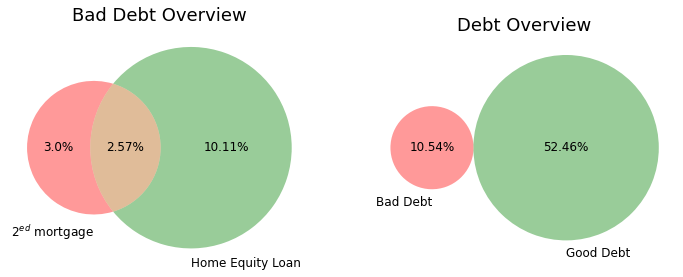

In [ ]:
# calculate mean value of dataframe:
mean_vals = df.mean(axis=0);

# Bad Debt Overview Ven Diagram:
fig, ax = plt.subplots(1,2, figsize=(12, 6)); label = ['2$^e$$^d$ mortgage','Home Equity Loan']
flds = ['second_mortgage','home_equity','home_equity_second_mortgage']; term = ['10','01','11'];

# create plots
out  = venn2(subsets=(mean_vals[flds[0]],mean_vals[flds[1]],mean_vals[flds[2]]),set_labels=(label[0],label[1]),ax=ax[0])
out1 = venn2(subsets = (mean_vals['bad_debt'], mean_vals['good_debt'],.00001), set_labels = ('Bad Debt', 'Good Debt'), ax=ax[1])

# non for loop settings
out1.get_label_by_id('10').set_text(str(round(100*mean_vals['bad_debt'],2)) + '%')
out1.get_label_by_id('01').set_text(str(round(100*mean_vals['good_debt'],2)) + '%')
out1.get_label_by_id('11').set_text(' ')

# for loop settings
for i in [0,1,2]: out.get_label_by_id(term[i]).set_text(str(round(100*mean_vals[flds[i]],2)) + '%')
for text in out.set_labels: text.set_fontsize(12); 
for text in out.subset_labels: text.set_fontsize(12)
for i in [0,1]: out1.set_labels[i].set_fontsize(12); out1.subset_labels[i].set_fontsize(12);
    
# title and plot data:
ax[1].title.set_text("Debt Overview"); 
ax[0].title.set_text("Bad Debt Overview"); 
ax[0].title.set_fontsize(18); ax[0].title.set_fontsize(18);
ax[1].title.set_fontsize(18); ax[1].title.set_fontsize(18);
plt.show()





potential output variables which to predict may be:
-whether the person will engage in a bad debt
-predict family income based on other features(such as demographics, morgages, etc)
-predict graduation rates based on demographic features


#Isolating an independent variable ema
1. erase all rows with no debt (in the future)
2. create a binary good debt variable
3. export this df
4. classifier
5. in the future: feature extraction

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from google.colab import drive
import numpy as np
drive.mount('/gdrive')
df1 = pd.read_csv("/gdrive/My Drive/Colab Notebooks/real_estate_db.csv", encoding = 'ISO-8859-1')
df=df1.copy()



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
flds = ['second_mortgage','home_equity','home_equity_second_mortgage'];
df['bad_debt']  = df[flds[0]].values + df[flds[1]].values - df[flds[2]].values


In [ ]:
#debt analysis
# list of fields 

for x in range (len(df ['bad_debt'])):
  if df ['bad_debt'][x]<0.5:
    df ['bad_debt'][x]=int(0)
  else:
    df ['bad_debt'][x]=int(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df[df['bad_debt'] ==1.0].head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,...,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
45,220409,NaN,140,90,2,Alaska,AK,Fairbanks,Chena Ridge,City,tract,99701,907,64.525793,-147.982193,3129211801,26859951,8546,5150,3396,2068.81742,2101.0,389.33708,215.48185,1955.0,0.99577,0.98310,0.93397,0.90597,0.76175,0.62705,0.53460,0.35922,2048,1893,64694.00034,56207.0,46582.96761,1145.54561,2048.0,...,56536.0,42591.63725,1067.11053,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99012,0.99679,0.98161,20.93281,22.50000,11.28371,1540.73062,5150.0,21.29013,22.66667,12.15100,930.24512,3396.0,0.0,0.54675,0.08153,0.01482,0.03392,1.0
164,220608,NaN,140,15,1,Alabama,AL,Alexandria,Alexandria,Town,tract,36250,256,33.718820,-85.952354,89660986,294151,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
165,220609,NaN,140,15,1,Alabama,AL,Anniston,Choccolocco,Town,tract,36206,256,33.707242,-85.750309,36078310,1072,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
492,221219,NaN,140,89,1,Alabama,AL,Huntsville,Redstone Arsenal,Town,tract,35824,256,34.632929,-86.655842,156677298,10599609,1662,1092,570,1267.43827,1278.0,386.28644,87.86203,280.0,0.86786,0.71786,0.63214,0.46071,0.32143,0.22143,0.10357,0.06429,300,280,92037.44130,64054.0,72152.32757,155.73019,300.0,...,64860.0,59509.25867,127.62603,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94046,0.95913,0.91667,25.58336,21.25000,13.99595,447.32670,1092.0,30.18006,26.33333,18.78041,148.57479,570.0,0.0,0.31823,0.10140,0.00000,0.02481,1.0
531,221306,NaN,140,97,1,Alabama,AL,Mobile,Mobile City,Town,tract,36608,251,30.695143,-88.182485,1900631,0,634,262,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,20.44444,19.91667,2.33653,159.14816,262.0,20.48851,20.75000,2.00394,237.06335,372.0,NaN,0.01908,0.01908,0.00000,0.00000,1.0


In [ ]:
#keeping only the relevant values: continuous. and dropping the missing values
df=df[['pop','rent_mean','rent_median','rent_gt_20','universe_samples','used_samples','family_median','married','separated','bad_debt']]
df=df.dropna()

In [ ]:
np.any(np.isnan(df))

False

In [ ]:
null_data = df[df.isnull().any(axis=1)]

In [ ]:
df.isnull().any(axis = 1).sum()

0

In [ ]:
#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9909694830807556

In [ ]:
#quale risultato tornerebbe un classifier randomizzato?
gooddebt=df[df.bad_debt == 0].shape[0]
baddebt=df[df.bad_debt == 1].shape[0]
print('Good debt values: {}, bad debt values: {}, Accuracy a caso: {}'.format(gooddebt,baddebt,gooddebt/(gooddebt+baddebt)) )


Good debt values: 38240, bad debt values: 296, Accuracy a caso: 0.9923188706663899


## DT Roberta

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("/gdrive/My Drive/Colab_Notebooks/real_estate_db.csv", encoding = 'ISO-8859-1')
df.tail(5)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
39025,294326,NaN,140,39,56,Wyoming,WY,Jackson,Rafter J Ranch,City,tract,83001,307,43.438652,-110.769450,77819972,845971,7986,3960,4026,1136.08074,1111.0,457.64257,534.77726,1286.0,0.84759,0.82893,0.73795,0.49456,0.31571,0.22628,0.20295,0.09798,1312,1286,102923.81690,81817.0,74424.93521,1199.56088,2950.0,103894.53700,89600.0,64737.28054,701.88369,1887.0,2205.76417,2045.0,1148.86490,416.51229,1192.0,505.10798,468.0,204.83698,446.0,298.02020,0.03602,0.03602,0.11844,0.72772,0.29720,0.36074,0.30301,0.94284,0.97083,0.91219,38.23101,37.41667,18.62246,885.91673,3960.0,35.90644,36.00000,20.66630,952.78660,4026.0,0.54379,0.50483,0.05769,0.04890,0.08726
39026,294327,NaN,140,41,56,Wyoming,WY,Mountain View,Urie,City,tract,82939,307,41.295517,-110.323344,2953929736,5101790,6629,3395,3234,727.87310,673.0,263.63428,320.27261,390.0,0.69231,0.57179,0.48974,0.42308,0.34615,0.26667,0.24359,0.16154,507,390,77201.06774,71128.0,53189.61572,1243.99078,2435.0,88884.90551,84817.0,47306.67619,670.08782,1647.0,1438.68335,1300.0,552.49510,428.69682,958.0,379.17789,334.0,214.27161,970.0,832.60152,0.01245,0.02645,0.05602,0.49689,0.38092,0.64714,0.78384,0.93762,0.92887,0.94710,36.94758,37.50000,21.58947,877.43975,3395.0,36.41243,36.33333,23.10673,785.48674,3234.0,0.78639,0.52106,0.00957,0.00153,0.19755
39027,294331,NaN,140,43,56,Wyoming,WY,Worland,Worland City,City,tract,82401,307,44.014369,-107.956379,1993203,0,2578,1264,1314,625.27917,630.0,224.62039,368.96641,441.0,0.97882,0.89882,0.71529,0.49647,0.44235,0.36706,0.19529,0.10824,448,425,46112.65105,32883.0,43138.48563,868.82474,1198.0,67173.10566,58014.0,46147.35792,355.91653,643.0,991.50615,862.0,391.52866,344.99367,409.0,314.89903,333.0,85.65192,341.0,324.33333,0.05200,0.05200,0.07333,0.54533,0.19480,0.56599,0.70665,0.84651,0.77739,0.91290,38.09749,38.75000,23.76134,277.06677,1264.0,42.03007,35.16667,26.52228,322.07543,1314.0,0.68378,0.47577,0.02643,0.01211,0.29185
39028,294333,NaN,140,45,56,Wyoming,WY,Upton,Osage,City,tract,82730,307,43.846213,-104.570020,6100269874,4817928,3442,1998,1444,782.11689,728.0,322.30003,155.75904,216.0,0.79630,0.48148,0.32870,0.28241,0.15741,0.11111,0.07870,0.03241,290,216,80755.40868,69215.0,58346.71855,668.00471,1393.0,95423.10808,88659.0,55150.44550,347.17292,909.0,1420.06645,1412.0,576.80270,214.66568,476.0,415.96980,382.0,187.65564,627.0,470.38485,0.00453,0.00453,0.02267,0.43155,0.57037,0.79223,0.86208,0.90238,0.90413,0.89991,44.12667,45.16667,20.79329,483.26603,1998.0,44.18268,47.16667,22.15831,335.79905,1444.0,0.82450,0.54247,0.06852,0.00906,0.14609
39029,294334,NaN,140,45,56,Wyoming,WY,Newcastle,Newcastle City,City,tract,82701,307,43.859560,-104.244461,110800075,183772,3710,1697,2013,932.02945,749.0,660.34890,227.23660,338.0,0.86391,0.73964,0.58876,0.45562,0.42604,0.42604,0.35799,0.35799,366,338,59965.19523,44313.0,54514.17323,982.86449,1593.0,76529.04933,77209.0,52838.37000,461.70541,977.0,1157.76932,1231.0,427.22011,317.46051,536.0,361.86514,370.0,147.70192,691.0,538.97980,0.00652,0.00652,0.02200,0.4

In [ ]:
import numpy as np
flds = ['second_mortgage','home_equity','home_equity_second_mortgage'];
df['bad_debt']  = df[flds[0]].values + df[flds[1]].values - df[flds[2]].values
df['good_debt'] = df['debt'] - df['bad_debt'];
df['no_debt']   = np.asarray(list(map(lambda x: 1-x,df['debt'])));
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,...,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,no_debt
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,tract,99685,907,53.621091,-166.770979,2823180154,3101986247,4619,2725,1894,1366.24657,1405.0,650.16380,131.50967,372.0,0.85676,0.65676,0.47838,0.35405,0.28108,0.21081,0.15135,0.12432,661,370,107394.63092,92807.0,70691.05352,329.85389,874.0,...,161.15239,519.0,2266.22562,2283.0,768.53497,41.65644,155.0,840.67205,776.0,341.85580,58.0,29.74375,0.00469,0.01408,0.02817,0.72770,0.50216,0.77143,0.30304,0.82841,0.82784,0.82940,38.45838,39.25000,17.65453,709.06255,2725.0,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802,0.03756,0.69014,0.27230
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,tract,99577,907,61.174250,-149.284329,509234898,1859309,3727,1780,1947,2347.69441,2351.0,382.73576,4.32064,44.0,0.79545,0.56818,0.56818,0.45455,0.20455,0.20455,0.20455,0.00000,50,44,136547.39117,119141.0,84268.79529,288.40934,1103.0,...,159.20875,836.0,2485.10777,2306.0,919.76234,180.92883,797.0,712.33066,742.0,336.98847,256.0,159.32270,0.03609,0.06078,0.07407,0.75689,0.15520,0.56228,0.23925,0.94090,0.97253,0.91503,37.26216,39.33333,19.66765,503.83410,1780.0,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575,0.09876,0.65813,0.24311
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,tract,99505,907,61.284745,-149.653973,270593047,66534601,8736,5166,3570,2071.30766,2089.0,442.89099,195.07816,1749.0,0.99469,0.97403,0.92680,0.89020,0.73022,0.62574,0.54368,0.32999,1933,1694,69361.23167,57976.0,45054.38537,1104.22753,1955.0,...,1023.98149,1858.0,NaN,NaN,NaN,NaN,NaN,525.89101,810.0,392.27170,22.0,10.83444,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.99097,0.99661,0.98408,21.96291,22.25000,11.09657,1734.05720,5166.0,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838,0.00000,0.00000,1.00000
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,tract,99501,907,61.229560,-149.893037,2371512,9966854,1941,892,1049,943.79086,914.0,308.34101,396.51652,720.0,0.97046,0.81435,0.67651,0.58509,0.39381,0.32208,0.27286,0.20253,723,711,66790.89936,48230.0,59069.63484,562.35527,902.0,...,227.29223,390.0,2289.79186,2359.0,697.02686,34.96584,140.0,491.86501,558.0,187.02879,39.0,24.35354,0.00000,0.00000,0.04469,0.78212,1.00000,0.69931,0.18899,0.89274,0.94301,0.84871,35.81912,34.00000,22.03023,213.71499,892.0,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563,0.04469,0.73743,0.21788
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,tract,99504,907,61.217082,-149.767214,1979230,0,5981,3076,2905,1372.84472,1222.0,541.82102,251.53249,878.0,0.97836,0.90319,0.80068,0.66856,0.45900,0.34738,0.24829,0.11276,914,878,76752.81635,66459.0,53486.53205,1015.66547,2065.0,...,623.26325,1290.0,1904.16410,1678.0,773.34778,224.18105,774.0,681.80199,717.0,189.79830,377.0,203.26263,0.04083,0.04083,0.08514,0.67246,0.26136,0.50952,0.43422,0.95351,0.96060,0.94669,34.13110,30.16667,21.32335,802.26386,3076.0,34.966

In [ ]:
df.tail()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,...,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,no_debt
39025,294326,NaN,140,39,56,Wyoming,WY,Jackson,Rafter J Ranch,City,tract,83001,307,43.438652,-110.769450,77819972,845971,7986,3960,4026,1136.08074,1111.0,457.64257,534.77726,1286.0,0.84759,0.82893,0.73795,0.49456,0.31571,0.22628,0.20295,0.09798,1312,1286,102923.81690,81817.0,74424.93521,1199.56088,2950.0,...,701.88369,1887.0,2205.76417,2045.0,1148.86490,416.51229,1192.0,505.10798,468.0,204.83698,446.0,298.02020,0.03602,0.03602,0.11844,0.72772,0.29720,0.36074,0.30301,0.94284,0.97083,0.91219,38.23101,37.41667,18.62246,885.91673,3960.0,35.90644,36.00000,20.66630,952.78660,4026.0,0.54379,0.50483,0.05769,0.04890,0.08726,0.11844,0.60928,0.27228
39026,294327,NaN,140,41,56,Wyoming,WY,Mountain View,Urie,City,tract,82939,307,41.295517,-110.323344,2953929736,5101790,6629,3395,3234,727.87310,673.0,263.63428,320.27261,390.0,0.69231,0.57179,0.48974,0.42308,0.34615,0.26667,0.24359,0.16154,507,390,77201.06774,71128.0,53189.61572,1243.99078,2435.0,...,670.08782,1647.0,1438.68335,1300.0,552.49510,428.69682,958.0,379.17789,334.0,214.27161,970.0,832.60152,0.01245,0.02645,0.05602,0.49689,0.38092,0.64714,0.78384,0.93762,0.92887,0.94710,36.94758,37.50000,21.58947,877.43975,3395.0,36.41243,36.33333,23.10673,785.48674,3234.0,0.78639,0.52106,0.00957,0.00153,0.19755,0.07002,0.42687,0.50311
39027,294331,NaN,140,43,56,Wyoming,WY,Worland,Worland City,City,tract,82401,307,44.014369,-107.956379,1993203,0,2578,1264,1314,625.27917,630.0,224.62039,368.96641,441.0,0.97882,0.89882,0.71529,0.49647,0.44235,0.36706,0.19529,0.10824,448,425,46112.65105,32883.0,43138.48563,868.82474,1198.0,...,355.91653,643.0,991.50615,862.0,391.52866,344.99367,409.0,314.89903,333.0,85.65192,341.0,324.33333,0.05200,0.05200,0.07333,0.54533,0.19480,0.56599,0.70665,0.84651,0.77739,0.91290,38.09749,38.75000,23.76134,277.06677,1264.0,42.03007,35.16667,26.52228,322.07543,1314.0,0.68378,0.47577,0.02643,0.01211,0.29185,0.07333,0.47200,0.45467
39028,294333,NaN,140,45,56,Wyoming,WY,Upton,Osage,City,tract,82730,307,43.846213,-104.570020,6100269874,4817928,3442,1998,1444,782.11689,728.0,322.30003,155.75904,216.0,0.79630,0.48148,0.32870,0.28241,0.15741,0.11111,0.07870,0.03241,290,216,80755.40868,69215.0,58346.71855,668.00471,1393.0,...,347.17292,909.0,1420.06645,1412.0,576.80270,214.66568,476.0,415.96980,382.0,187.65564,627.0,470.38485,0.00453,0.00453,0.02267,0.43155,0.57037,0.79223,0.86208,0.90238,0.90413,0.89991,44.12667,45.16667,20.79329,483.26603,1998.0,44.18268,47.16667,22.15831,335.79905,1444.0,0.82450,0.54247,0.06852,0.00906,0.14609,0.02267,0.40888,0.56845
39029,294334,NaN,140,45,56,Wyoming,WY,Newcastle,Newcastle City,City,tract,82701,307,43.859560,-104.244461,110800075,183772,3710,1697,2013,932.02945,749.0,660.34890,227.23660,338.0,0.86391,0.73964,0.58876,0.45562,0.42604,0.42604,0.35799,0.35799,366,338,59965.19523,44313.0,54514.17323,982.86449,1593.0,...,461.70541,977.0,1157.76932,1231.0,427.22011,317.46051,536.0,361.86514,370.0,147.70192,691.0,538.97980,0.00652,0.00652,0.02200,0.43684,0.56165,0.79457,0.85679,0.85732,0.90136,0.82084,

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
len(categorical_columns)

6

In [ ]:
num_columns=list(set(df._get_numeric_data().columns))
len(num_columns)

77

# Roberta Pappolla

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
dfDS = pd.read_csv("/gdrive/My Drive/Colab_Notebooks/DataScientist.csv")
dfDS.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
dfDS.tail(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1
3908,3908,4379,Patient Safety Physician or Safety Scientist -...,$55K-$112K (Glassdoor est.),"Help us transform patients' lives.\nAt UCB, we...",3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1


In [ ]:
dfDS.dtypes

Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [ ]:
dfDS['Easy Apply'].unique() #-1? assenza oppure null?

array(['-1', 'True'], dtype=object)

In [ ]:
dfDS['Competitors'].unique()#-1 null anche per Founded

array(['-1', 'Zocdoc, Healthgrades', 'BBDO, Grey Group, Droga5',
       'Colony Specialty, Markel, RLI',
       'Crossix Solutions Inc., AppNexus, The Trade Desk', 'Oracle',
       'Commerce Signals, Cardlytics, Yodlee',
       'Airbnb, Warby Parker, Kickstarter',
       'McKinsey & Company, Accenture, Deloitte',
       'News Corp, WarnerMedia, NBCUniversal', 'GoDaddy',
       'Virtu Financial', 'Travelers, Chubb, Crum & Forster',
       'Google, Microsoft, Apple',
       'Advisory Board, Booz Allen Hamilton, McKinsey & Company',
       'Amazon, Apple', 'Google, Microsoft, Walmart',
       'Renaissance Technologies LLC, Two Sigma, AQR Capital Management',
       'SoFi, LendingClub, Freedom Financial Network',
       'Collabera, Mitchell Martin, The Judge Group',
       'Brightedge Technologies, Moz, seoClarity',
       'Economist Group, Wall Street Journal',
       'Microsoft, Apple, Facebook',
       'Oracle, Salesforce, 24/7 Real Media',
       'Google, Goldman Sachs, Thomson Reuters

In [ ]:
dfDS['Rating'].unique()#-1 null

array([ 3.5,  4.5, -1. ,  3.4,  2.9,  4.4,  5. ,  4.8,  3.9,  4.3,  3. ,
        3.6,  3.3,  4. ,  4.1,  3.8,  3.7,  4.2,  4.6,  4.7,  3.2,  2.8,
        2.7,  4.9,  2.5,  1. ,  1.9,  3.1,  1.6,  2.6,  2.1,  2.3,  2.4,
        2. ,  2.2,  1.5,  1.7])

In [ ]:
dfDS[dfDS == -1].count() 

Unnamed: 0             0
index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating               409
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded              977
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Easy Apply             0
dtype: int64

In [ ]:
dfDS[dfDS['Competitors']== '-1'].count() 

In [ ]:
dfDS.describe()

In [ ]:
print(dfDS['Job Title'].nunique())
dfDS['Job Title'].unique()

2079


array(['Senior Data Scientist', 'Data Scientist, Product Analytics',
       'Data Science Manager', ..., 'Cyber Security Data Engineer',
       'Security Analytics Data Engineer',
       'Patient Safety Physician or Safety Scientist - UK, Europe or the US'],
      dtype=object)

In [ ]:
JR = dfDS[['Job Title','Company Name','Rating']]
JR[:10]

,Job Title,Company Name,Rating
0,Senior Data Scientist,Hopper\n3.5,3.5
1,"Data Scientist, Product Analytics",Noom US\n4.5,4.5
2,Data Science Manager,Decode_M,-1.0
3,Data Analyst,Sapphire Digital\n3.4,3.4
4,"Director, Data Science",United Entertainment Group\n3.4,3.4
5,Data Scientist,IFG Companies\n2.9,2.9
6,Quantitative Researcher,PDT Partners\n4.4,4.4
7,Quantitative Research Associate,Enlightenment Research,-1.0
8,AI Scientist,Paige\n5.0,5.0
9,Quantitative Researcher,Jane Street\n4.8,4.8


In [ ]:
LR = dfDS[['Location','Rating']]
LR[:10]


,Location,Rating
0,"New York, NY",3.5
1,"New York, NY",4.5
2,"New York, NY",-1.0
3,"Lyndhurst, NJ",3.4
4,"New York, NY",3.4
5,"New York, NY",2.9
6,"New York, NY",4.4
7,"New York, NY",-1.0
8,"New York, NY",5.0
9,"New York, NY",4.8


In [ ]:
query= dfDS.groupby('Location')['Rating'].mean()
query2= dfDS.groupby('Location')['Rating'].max()
query3= dfDS.groupby('Location')['Rating'].min()
print('La media del rating per città:\n',query)
print('\n\nIl massimo del rating per città:\n',query2)
print('\n\nIl minimo del rating per città:\n',query3)

La media del rating per città:
 Location
Addison, TX           3.900
Allegheny West, PA    3.800
Allen, TX             3.825
Alvin, TX             2.900
Anaheim, CA           3.450
                      ...  
Westmont, IL          3.650
Whittier, CA          3.300
Wilmington, CA        3.900
Wilmington, DE        3.410
Woodland Hills, CA    2.250
Name: Rating, Length: 191, dtype: float64


Il massimo del rating per città:
 Location
Addison, TX           4.3
Allegheny West, PA    3.8
Allen, TX             5.0
Alvin, TX             2.9
Anaheim, CA           3.9
                     ... 
Westmont, IL          3.9
Whittier, CA          3.3
Wilmington, CA        3.9
Wilmington, DE        5.0
Woodland Hills, CA    4.1
Name: Rating, Length: 191, dtype: float64


Il minimo del rating per città:
 Location
Addison, TX           3.2
Allegheny West, PA    3.8
Allen, TX             2.4
Alvin, TX             2.9
Anaheim, CA           3.0
                     ... 
Westmont, IL          3.4
Whittier, 

# Lorenzo Ferri

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('credit_train.csv')
df2 = pd.read_csv('credit_test.csv')  # il test non ha l'attributo Loan Status, quindi si può anche escludere

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

NameError: ignored

In [ ]:
df.groupby('Loan Status').size()[0] / df.groupby('Loan Status').size()[1] 

0.2926409948165096

In [ ]:
df = df.sort_values(by=['Loan ID', 'Customer ID'])

In [ ]:
df.loc[df.duplicated(keep=False)].head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10203,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202.0,Short Term,715.0,1759533.0,2 years,Rent,Debt Consolidation,23020.59,13.8,NaN,11.0,0.0,445987.0,733546.0,0.0,0.0
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202.0,Short Term,715.0,1759533.0,2 years,Rent,Debt Consolidation,23020.59,13.8,NaN,11.0,0.0,445987.0,733546.0,0.0,0.0
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496.0,Short Term,706.0,664753.0,NaN,Own Home,other,8087.92,21.3,NaN,7.0,1.0,79382.0,150700.0,1.0,0.0
98875,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496.0,Short Term,706.0,664753.0,NaN,Own Home,other,8087.92,21.3,NaN,7.0,1.0,79382.0,150700.0,1.0,0.0
37199,0016d326-7878-46bb-9c18-a75af255d7fe,eccd2965-56cf-4be0-99b2-893f8a520fea,Fully Paid,88770.0,Short Term,700.0,1671221.0,2 years,Home Mortgage,Home Improvements,2562.53,10.3,NaN,3.0,1.0,67279.0,124234.0,1.0,0.0
96730,0016d326-7878-46bb-9c18-a75af255d7fe,eccd2965-56cf-4be0-99b2-893f8a520fea,Fully Paid,88770.0,Short Term,700.0,1671221.0,2 years,Home Mortgage,Home Improvements,2562.53,10.3,NaN,3.0,1.0,67279.0,124234.0,1.0,0.0
54765,0018f629-8cef-48bd-bb93-40179f24256c,1e96933c-3a01-46b2-975d-06c5a2b469c3,Fully Paid,66396.0,Short Term,711.0,535192.0,3 years,Rent,Debt Consolidation,9142.80,15.8,50.0,8.0,0.0,112347.0,307538.0,0.0,0.0
90946,0018f629-8cef-48bd-bb93-40179f24256c,1e96933c-3a01-46b2-975d-06c5a2b469c3,Fully Paid,66396.0,Short Term,711.0,535192.0,3 years,Rent,Debt Consolidation,9142.80,15.8,50.0,8.0,0.0,112347.0,307538.0,0.0,0.0
63182,001a84a9-3fd5-4e82-9153-49325b996408,b282e6f9-2d09-4988-b579-6d90d104e70d,Fully Paid,180246.0,Long Term,658.0,858097.0,2 years,Rent,Other,10289.83,18.4,58.0,8.0,0.0,288553.0,440220.0,0.0,0.0
70577,001a84a9-3fd5-4e82-9153-49325b996408,b282e6f9-2d09-4988-b579-6d90d104e70d,Fully Paid,180246.0,Long Term,658.0,858097.0,2 years,Rent,Other,10289.83,18.4,58.0,8.0,0.0,288553.0,440220.0,0.0,0.0


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.shape

(99786, 19)

In [ ]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [ ]:
df.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,258082.0,Short Term,746.0,950475.0,4 years,Rent,Debt Consolidation,6748.42,11.5,NaN,12.0,0.0,330429.0,815782.0,0.0,0.0
1,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,541486.0,Long Term,NaN,NaN,6 years,Rent,Business Loan,10303.51,17.6,73.0,7.0,0.0,268337.0,372988.0,0.0,0.0


In [ ]:
df.nunique()

Loan ID                         88354
Customer ID                     88354
Loan Status                         2
Current Loan Amount             22502
Term                                2
Credit Score                      326
Annual Income                   37853
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    69750
Years of Credit History           507
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33641
Maximum Open Credit             46468
Bankruptcies                        8
Tax Liens                          13
dtype: int64

In [ ]:
df.groupby('Loan Status').size()[0] / df.groupby('Loan Status').size()[1]

0.33716081374914364

In [ ]:
df.isnull().sum()

Loan ID                             1
Customer ID                         1
Loan Status                     10001
Current Loan Amount                 1
Term                                1
Credit Score                    21136
Annual Income                   21136
Years in current job             4230
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    53644
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      213
Tax Liens                          11
dtype: int64

In [ ]:
df = df.drop(labels='Months since last delinquent', axis='columns')
df = df.drop(labels=['Loan ID', 'Customer ID'], axis='columns')

In [ ]:
df = df.loc[df['Loan ID'].isnull() == False].loc[df['Customer ID'].isnull() == False]

In [ ]:
df = df.loc[df['Credit Score'].isnull() == False].loc[df['Annual Income'].isnull() == False]

In [ ]:
df = df.loc[df['Tax Liens'].isnull() == False]

In [ ]:
df = df.loc[df['Maximum Open Credit'].isnull() == False]

In [ ]:
df = df.loc[df['Loan Status'].isnull() == False]

In [ ]:
df = df.loc[df['Years in current job'].isnull() == False]

In [ ]:
df = df.loc[df['Bankruptcies'].isnull() == False]

In [ ]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [ ]:
df.shape

(67490, 16)

In [ ]:
df.groupby('Loan Status').size()[0] / df.groupby('Loan Status').size()[1]

0.3162103128169124

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(labels='Loan Status', axis='columns')
y = df['Loan Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=50)

In [ ]:
X_train.head(2)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
387,151690.0,Short Term,741.0,1362452.0,7 years,Home Mortgage,Debt Consolidation,27975.79,16.0,12.0,0.0,136610.0,188078.0,0.0,0.0
59710,453398.0,Short Term,700.0,1771427.0,2 years,Rent,Debt Consolidation,18009.53,11.0,7.0,0.0,290339.0,418660.0,0.0,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns = list(set(X_train.columns) - set(X_train._get_numeric_data().columns))
categorical_columns

['Purpose', 'Term', 'Home Ownership', 'Years in current job']

In [ ]:
for column in categorical_columns:
    X_train[column] = LabelEncoder().fit_transform(X_train[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train.head(2)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
387,151690.0,1,741.0,1362452.0,7,1,3,27975.79,16.0,12.0,0.0,136610.0,188078.0,0.0,0.0
59710,453398.0,1,700.0,1771427.0,2,3,3,18009.53,11.0,7.0,0.0,290339.0,418660.0,0.0,0.0


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
for column in categorical_columns:
    X_test[column] = LabelEncoder().fit_transform(X_test[column])

X_test.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
80490,99999999.0,1,742.0,1312672.0,1,1,3,14220.74,43.4,9.0,3.0,86697.0,438350.0,0.0,0.0
37365,99999999.0,1,740.0,1520760.0,8,1,3,24839.08,11.7,12.0,0.0,476615.0,933768.0,0.0,0.0


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.738850200029634